### 로지스틱 회귀

In [1]:
# K 최근접이웃 분류기로 확률을 계산해보자
import pandas as pd

fish=pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# 종속특성의 클래스 갯수 확인  -> 어종의 클래스 개수는 '7개'
# 다중분류
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [36]:
# 독립특성 데이터셋 설정
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()


In [37]:
# 종속특성 데이터셋 설정
fish_target=fish['Species'].to_numpy()


In [5]:
# train, test
# 7.5 : 2.5
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [6]:
# 데이터 표준화 
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_input)     
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [7]:
# K 최근접이웃 분류기로 확룔을 예측해보기
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)

print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8907563025210085
0.85


In [8]:
# 모델이 학습한 클래스
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [9]:
## 주의할 점 
## 모델이 학습한 클래스 순선
## 데이터프레임의 순서는 다르다
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [10]:
print(kn.predict(test_scaled[:5]))   # 예측값

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [11]:
print(test_target[:5]) # 실제값

['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


In [12]:
# 확률 반환
import numpy as np

propa=kn.predict_proba(test_scaled[:5])
print(np.round(propa,decimals=4))
print('')
print(kn.classes_)

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


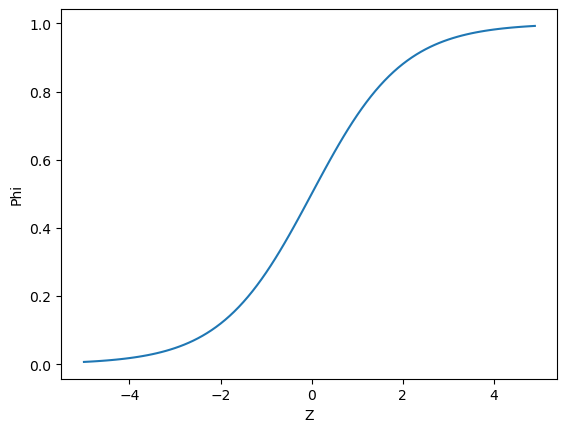

In [13]:
# 로지스틱 함수 시각화 1
import numpy as np
import matplotlib.pyplot as plt 

z=np.arange(-5,5,0.1)
phi=1/(1+np.exp(-z))

plt.plot(z,phi)
plt.xlabel('Z')
plt.ylabel('Phi')
plt.show()


# 0.5 = 1(양성)

In [14]:
# 도미와 빙어 데이터만 가지고 이진분류 수행하기


## train_scaled, train_target에서 도미(Bream), 빙어(smelt)의 데이터만 가지고

# 불린 인덱싱
mask=(train_target=='Bream')|(train_target=='Smelt')


train_bream_smelt=train_scaled[mask]


target_bream_smelt=train_target[mask]

In [15]:
train_bream_smelt

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [ 0.30041219,  0.23459067,  0.42823457,  1.36042157,  0.22329758],
       [ 0.9027693 ,  0.70314202,  0.88858491,  1.89027545,  0.85537174],
       [-1.0824759 , -1.61150165, -1.62162731, -1.7000674 , -1.92815631],
       [ 0.10337949,  0.04717013,  0.23714575,  0.88445197,  0.41799764],
       [ 1.49668216,  1.03112796,  1.21864741,  2.44274986,  1.40289707],
       [ 0.23004337,  0.23459067,  0.42823457,  1.3336029 ,  0.39983213],
       [-0.42579405, -0.29018684, -0.11028847,  0.65627104, -0.26107519],
       [ 1.28557569,  0.70314202,  0.89727076,  1.98228866,  1.06683526],
       [ 0.93373158,  0.60943175,  0.83646978,  1.85150445,  0.97832415],
       [ 0.80706771,  0.60943175,  0.81041221,  1.63137406,  1.0255057 ],
       [-1.07262426, -1.52716241, -1.5

In [16]:
# 로지스틱 모델 학습

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

LogisticRegression()

In [17]:
# 테스트셋 5개 샘플 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [18]:
# 예측 클래스 확률 출력
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [20]:
# 양성값, 음성값 확인(Bream, Smelt 확인)
print(lr.classes_)

['Bream' 'Smelt']


In [21]:
# 로지스틱 회귀 방정식 확인
print(lr.coef_,lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [22]:
# decision function으로 z값 확인하기
decisions=lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [23]:
from scipy.special import expit
print(expit(decisions))

# 1= 빙어, 빙어일 확률~

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [24]:
#### 다중분류
## C=alpha(규제)
## C는 커질수록 작아짐

lr=LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,train_target)


print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [25]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [26]:
# 초기 5개 샘플에 대한 확률을 출력
proba=lr.predict_proba(test_scaled[:5])

In [28]:
print(np.round(proba,3))
print('')
print(lr.classes_)

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [29]:
# 보고를 위한 다중분류 회귀식 확인
print(lr.coef_)
print('')
print(lr.intercept_)

[[-1.49002452 -1.02914945  2.59347296  7.70356699 -1.20069497]
 [ 0.19618491 -2.01065841 -3.77978758  6.50490995 -1.99483965]
 [ 3.56279371  6.34358541 -8.48971882 -5.75757024  3.79307922]
 [-0.10458094  3.60318549  3.93067688 -3.61734746 -1.75069885]
 [-1.40060817 -6.07504028  5.25968854 -0.87221028  1.86043575]
 [-1.38526764  1.49215536  1.39226949 -5.67733599 -4.40096958]
 [ 0.62150265 -2.32407812 -0.90660147  1.71598703  3.69368809]]

[-0.09205092 -0.26290886  3.2510131  -0.14743222  2.65497661 -6.78781882
  1.38422111]


In [30]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [31]:
# 이진분류처럼 decision function을 사용하여 모델 회귀식을 통해 z값 구하기
decision=lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [32]:
# 소프트맥스 적용
from scipy.special import softmax

proba=softmax(decision,axis=1)
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 아이리스 데이터 다중분류

In [33]:
# 로지스틱을 활용해 아이리스(붓꽃)의 종류를 분류
# 회귀식 도출
# 5개 샘플의 확률 예측

from sklearn.datasets import load_iris
import pandas as pd

iris=load_iris()
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['target']=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
